In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Compose several transformaations together. ToTensor() converts the image into numbers, that are understandable by the system; The image now is a [TorchTensor](https://pytorch.org/docs/stable/torchvision/transforms.html). Normalize() normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)), ])

In [4]:
trainset = datasets.MNIST('./', download=True, train=True, transform=transform)
valset = datasets.MNIST('./', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100%|█████████████████████████████████████████████████████████████████████▉| 9912320/9912422 [03:36<00:00, 35987.61it/s]

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                         | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 70127.85it/s]                                                                                           

Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



0it [00:00, ?it/s]
 37%|██████████████████████████▍                                            | 614400/1648877 [00:11<00:41, 25049.94it/s]
9920512it [03:49, 35987.61it/s]                                                                                         
 49%|██████████████████████████████████▉                                    | 811008/1648877 [00:18<00:26, 31180.88it/s]


100%|█████████████████████████████████████████████████████████████████████▉| 1646592/1648877 [00:31<00:00, 57716.25it/s]

Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                          | 0/4542 [00:00<?, ?it/s]

8192it [00:01, 30061.59it/s]                                                                                            

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw
Processing...
Done!



1654784it [00:51, 57716.25it/s]                                                                                         

Create an iterable object from training set. Note: There are 64 images in each batch and each image has a dimension of 28 x 28 pixels.

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


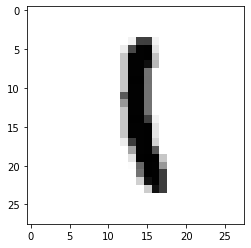

In [9]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

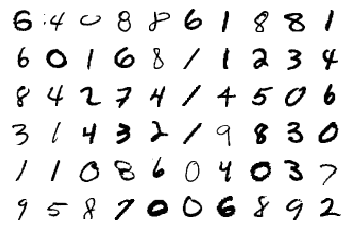

In [16]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Figure showing Neural Network: https://miro.medium.com/max/787/1*HWhBextdDSkxYvz0kEMTVg.png

In [17]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[1], output_size), 
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [18]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [19]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-5.2696e-04, -5.2696e-04, -5.2696e-04,  ..., -5.2696e-04,
         -5.2696e-04, -5.2696e-04],
        [-3.2881e-03, -3.2881e-03, -3.2881e-03,  ..., -3.2881e-03,
         -3.2881e-03, -3.2881e-03],
        [-2.0027e-03, -2.0027e-03, -2.0027e-03,  ..., -2.0027e-03,
         -2.0027e-03, -2.0027e-03],
        ...,
        [ 4.1845e-03,  4.1845e-03,  4.1845e-03,  ...,  4.1845e-03,
          4.1845e-03,  4.1845e-03],
        [-4.8785e-05, -4.8785e-05, -4.8785e-05,  ..., -4.8784e-05,
         -4.8784e-05, -4.8784e-05],
        [-3.6360e-03, -3.6360e-03, -3.6360e-03,  ..., -3.6360e-03,
         -3.6360e-03, -3.6360e-03]])


In [20]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6329264893397085
Epoch 1 - Training loss: 0.277184764260867
Epoch 2 - Training loss: 0.21341604699315167
Epoch 3 - Training loss: 0.1727298393027424
Epoch 4 - Training loss: 0.1455972737440073
Epoch 5 - Training loss: 0.12396125450059137
Epoch 6 - Training loss: 0.11053153017817784
Epoch 7 - Training loss: 0.0982622223914162
Epoch 8 - Training loss: 0.08797078654031033
Epoch 9 - Training loss: 0.08048437252841287
Epoch 10 - Training loss: 0.07249508432146393
Epoch 11 - Training loss: 0.06673339834418902
Epoch 12 - Training loss: 0.06269368057291626
Epoch 13 - Training loss: 0.05690202516327892
Epoch 14 - Training loss: 0.05200258208570807

Training Time (in minutes) = 4.298671102523803


In [22]:

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


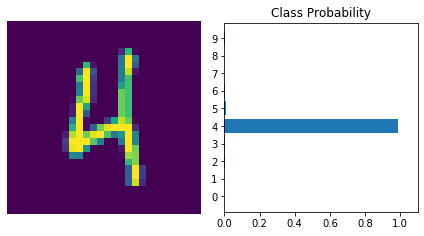

In [23]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [24]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9744


In [25]:
torch.save(model, './mnist_model.pt')